In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data = data.drop(columns='Person ID')

In [4]:
data.shape

(374, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [6]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')


In [9]:
###Numerical and Categorical Split
cat_col = data.select_dtypes('object')

print('There is a total of ',cat_col.shape[1],'categorical columns')

There is a total of  5 categorical columns


In [10]:
num_col = data.select_dtypes('number')

print('There is a total of ',num_col.shape[1],'categorical columns')

There is a total of  7 categorical columns


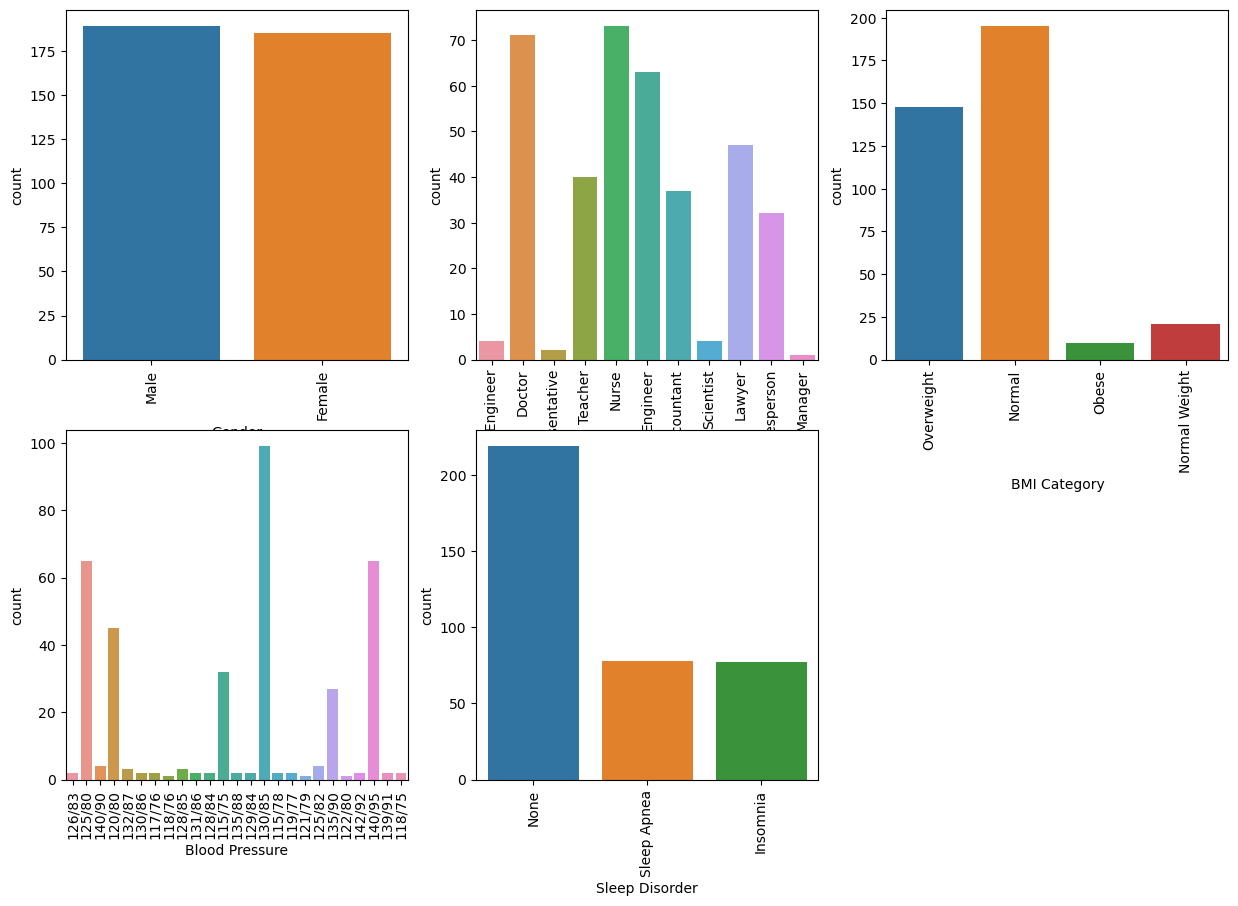

In [11]:
##Analyze the categorical variables

fig = plt.figure(figsize = (15,10))

for i ,var in enumerate(cat_col):
    plt.subplot(2,3,i+1)
    sns.countplot(x= var, data= cat_col)
    plt.xticks(rotation = 90)
plt.show()
    
    

In [12]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [13]:
### We notice that in BMI Category the data is redundant, so we are going to group it into just two labels

data['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [14]:
data['BMI Category'] = data['BMI Category'].replace({'Obese':'Overweight','Normal Weight':'Normal'})
data['BMI Category'].value_counts()

Normal        216
Overweight    158
Name: BMI Category, dtype: int64

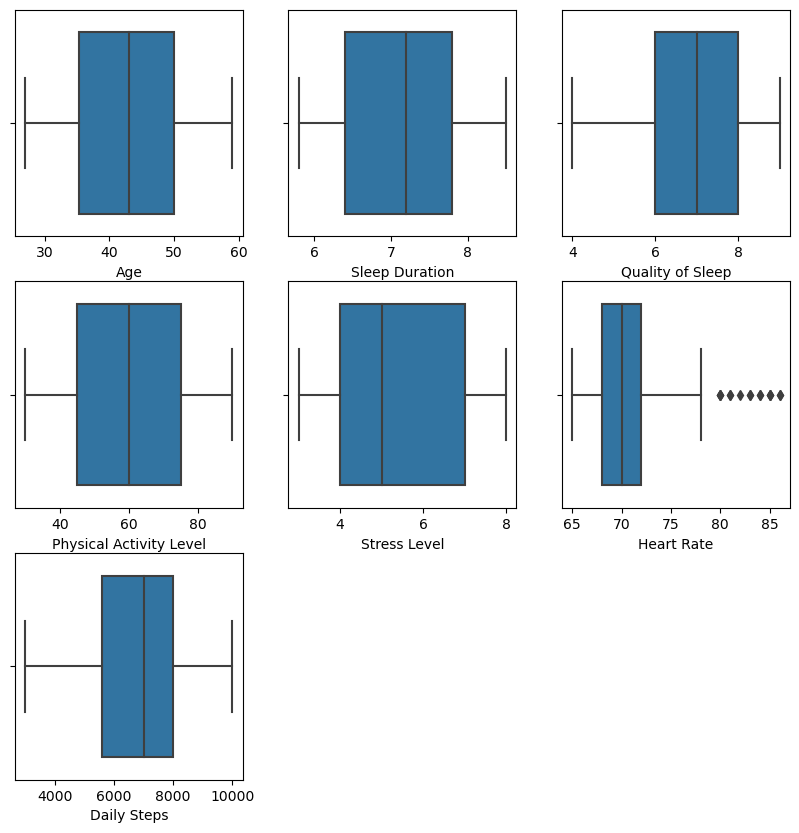

In [15]:
##Analyze the Numerical Variables

fig = plt.figure(figsize = (10,10))

for i, var in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= var, data =num_col)
plt.show()    
    

C:\Users\Dell\AppData\Local\Temp\ipykernel_23908\2317824295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True)


<Axes: >

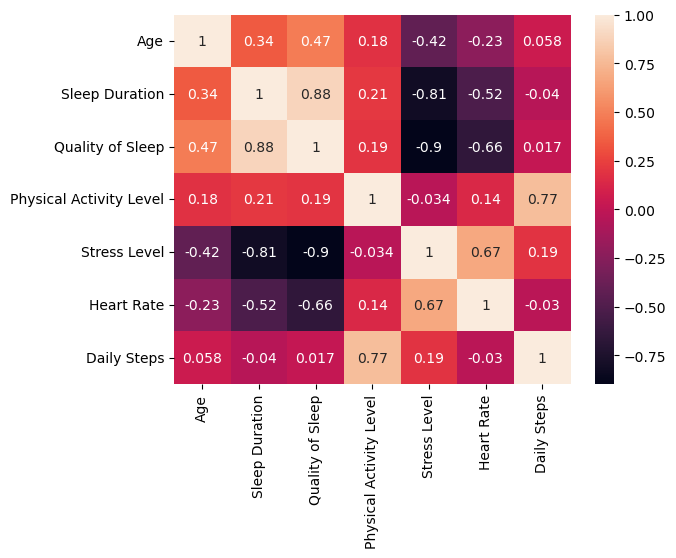

In [16]:
sns.heatmap(data=data.corr(),annot=True)

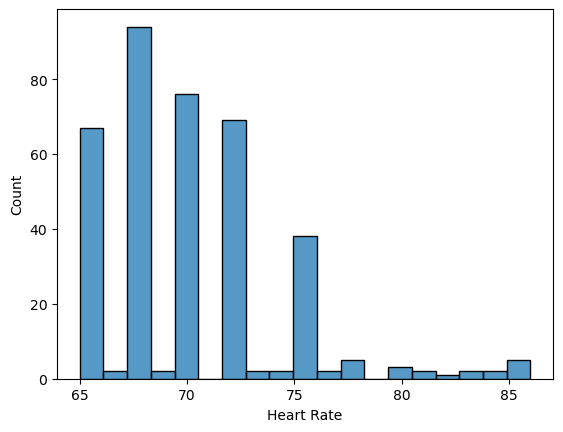

In [17]:
#heart Rate Outliers"
sns.histplot(num_col,x='Heart Rate')
plt.show()

In [18]:
###Sleep Disorder Analisys

In [19]:
df = 'Sleep Disorder'

In [20]:
data[df].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

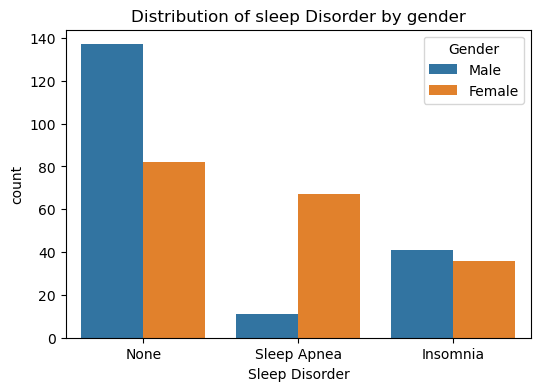

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data = data,hue='Gender', x =df)
plt.title('Distribution of sleep Disorder by gender', fontsize =12)
plt.show()

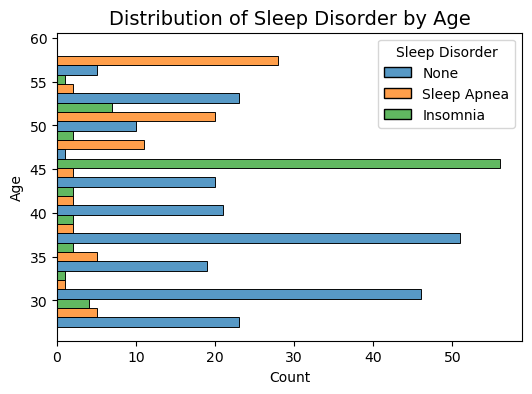

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, hue=df, y='Age',
             multiple = "dodge")
plt.title('Distribution of Sleep Disorder by Age', fontsize=14)
plt.show()

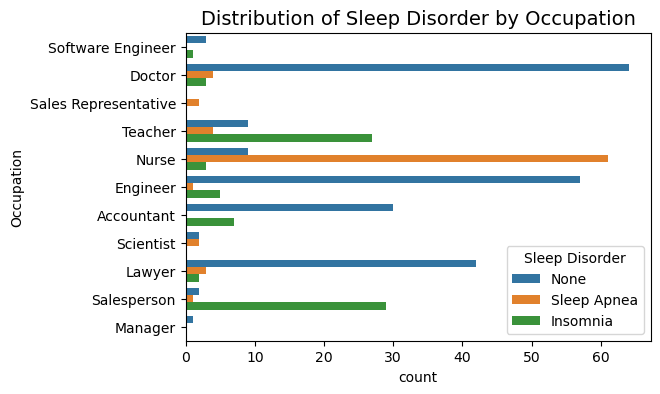

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, hue=df, y='Occupation')
plt.title('Distribution of Sleep Disorder by Occupation', fontsize=14)
plt.show()


In [28]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [34]:
##Preprocessing Categorical Variables
data.select_dtypes('object').head(2)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
